# Intro to Bayesian Statistics Lab

Complete the following set of exercises to solidify your knowledge of Bayesian statistics and Bayesian data analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Cookie Problem

Suppose we have two bowls of cookies. Bowl 1 contains 30 vanilla cookies and 10 chocolate cookies. Bowl 2 contains 20 of each. You randomly pick one cookie out of one of the bowls, and it is vanilla. Use Bayes Theorem to calculate the probability that the vanilla cookie you picked came from Bowl 1?

In [4]:
p_vanilla=(3/4)*(1/2)+(1/2)*(1/2)
p_vanilla_bw1=((3/4)*(1/2))/p_vanilla
p_vanilla_bw1

0.6

What is the probability that it came from Bowl 2?

In [5]:
p_vanilla_bw2=((1/2)*(1/2))/p_vanilla
p_vanilla_bw2

0.4

What if the cookie you had picked was chocolate? What are the probabilities that the chocolate cookie came from Bowl 1 and Bowl 2 respectively?

In [6]:
p_chocolate=(1/4)*(1/2)+(1/2)*(1/2)
p_chocolate_bw1=((1/4)*(1/2))/p_chocolate
p_chocolate_bw2=((1/2)*(1/2))/p_chocolate
print('Probability the cookie came from Bowl1:',p_chocolate_bw1)
print('Probability the cookie came from Bowl2:',p_chocolate_bw2)

Probability the cookie came from Bowl1: 0.3333333333333333
Probability the cookie came from Bowl2: 0.6666666666666666


## 2. Candy Problem

Suppose you have two bags of candies:

- In Bag 1, the mix of colors is:
    - Brown - 30%
    - Yellow - 20%
    - Red - 20%
    - Green - 10%
    - Orange - 10%
    - Tan - 10%
    
- In Bag 2, the mix of colors is:
    - Blue - 24%
    - Green - 20%
    - Orange - 16%
    - Yellow - 14%
    - Red - 13%
    - Brown - 13%
    
Not knowing which bag is which, you randomly draw one candy from each bag. One is yellow and one is green. What is the probability that the yellow one came from the Bag 1?

*Hint: For the likelihoods, you will need to multiply the probabilities of drawing yellow from one bag and green from the other bag and vice versa.*

In [8]:
p_yellow=(1/5)*(1/2)+(7/50)*(1/2)
p_yellow_b1=((1/5)*(1/2))/p_yellow
p_green=(1/10)*(1/2)+(1/5)*(1/2)
p_geen_b2=((1/5)*(1/2))/p_green
p_yellow1_green2=p_yellow_b1*p_geen_b2
p_yellow1_green2

0.39215686274509803

What is the probability that the yellow candy came from Bag 2?

In [9]:
p_yellow_b2=((7/50)*(1/2))/p_yellow
p_geen_b1=((1/10)*(1/2))/p_green
p_yellow2_green1=p_yellow_b2*p_geen_b1
p_yellow2_green1

0.13725490196078433

What are the probabilities that the green one came from Bag 1 and Bag 2 respectively?

In [11]:
print('Probabilities that the green one came from Bag 1 is',p_yellow2_green1)
print('Probabilities that the green one came from Bag 2 is',p_yellow1_green2)

Probabilities that the green one came from Bag 1 is 0.13725490196078433
Probabilities that the green one came from Bag 2 is 0.39215686274509803


## 3. Monty Hall Problem

Suppose you are a contestant on the popular game show *Let's Make a Deal*. The host of the show (Monty Hall) presents you with three doors - Door A, Door B, and Door C. He tells you that there is a sports car behind one of them and if you choose the correct one, you win the car!

You select Door A, but then Monty makes things a little more interesting. He opens Door B to reveal that there is no sports car behind it and asks you if you would like to stick with your choice of Door A or switch your choice to Door C. Given this new information, what are the probabilities of you winning the car if you stick with Door A versus if you switch to Door C?

In [13]:
DoorA=((1/3)*(1/3))/(1/3*1/3+1/3*1/3+1/3*1/3)
DoorC=((1/3)*(2/3))/(1/3*1/3+1/3*1/3+1/3*1/3)
print('probability of winning the car sticking with Door A',DoorA)
print('probability of winning the car switching to Door C',DoorC)

probability of winning the car sticking with Door A 0.3333333333333333
probability of winning the car switching to Door C 0.6666666666666666


## 4. Bayesian Analysis 

Suppose you work for a landscaping company, and they want to advertise their service online. They create an ad and sit back waiting for the money to roll in. On the first day, the ad sends 100 visitors to the site and 14 of them sign up for landscaping services. Create a generative model to come up with the posterior distribution and produce a visualization of what the posterior distribution would look like given the observed data.

<AxesSubplot:>

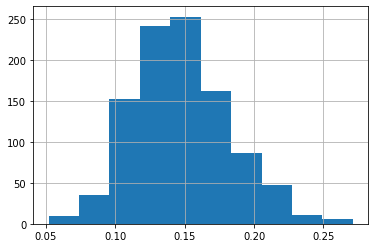

In [20]:
n_draws = 100_000
prior = pd.Series(np.random.uniform(0,1,size=n_draws))
def generative_model(proba_compra):
    compraron = np.random.binomial(100, proba_compra)
    return compraron
compraron = list()
for equipo in prior:
    compraron.append(generative_model(equipo))
posteriori = prior[list(map(lambda x:x ==14, compraron))]
posteriori.hist()

Produce a set of descriptive statistics for the posterior distribution.

In [21]:
posteriori.describe()

count    1004.000000
mean        0.147412
std         0.034774
min         0.051833
25%         0.123244
50%         0.145268
75%         0.168321
max         0.271232
dtype: float64

What is the 90% credible interval range?

In [22]:
print(f'({posteriori.quantile(0.05)},{posteriori.quantile(0.95)})')

(0.09734429823795133,0.21125552606791898)


What is the Maximum Likelihood Estimate?

In [25]:
posteriori.mean()

0.1474116609430692